In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('https://github.com/SadSabrina/YOLO_CAM_analysis/raw/refs/heads/main/data/results.csv', index_col=[0])
dataset.head()

,original_0,original_1,original_2,original_3,original_4,noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,abs_diff_between_act_mean,abs_diff_between_act_median
7 (77).jpg,22,2,13,10,6,7,2,12,4,0,0.883505,0.228101
4 (104).jpg,21,9,8,6,6,6,5,2,0,0,0.942098,0.228245
11 (44).jpg,8,10,8,0,1,1,3,3,1,1,0.849463,0.161053
5 (68).jpg,10,1,8,1,0,5,0,5,0,1,0.900739,0.129077
5 (213).jpg,16,5,7,4,2,2,9,1,0,0,0.956268,0.290467


# **1. Разница в количестве детектированных объектов класса на оригинальном изображении и изображении с шумом.**

Для оценки изменения прогнозов модели при добавлении шума, был собран набор данных с прогнозами модели. Для каждого изображения собиралось количество детектируемых объектов классов 0, 1, 2, 3, 4 соответственно. Полученные данные были проанализированы следующим образом:

1) Для каждого класса оценена абсолютная разность между его количеством на оригинальном и зашумленной изображении.  \
2) Построена сводка по средним, медианным и нулевым разностям, соответствующим неизменным прогнозам.



In [ ]:
mean_detect_diff = []
median_detect_diff = []
zero_cnt = []

for i in range(0, 5):
  d_arr = np.abs(dataset[f'original_{i}'] - dataset[f'noisy_{i}'])
  mean_d = d_arr.mean()
  median_d = d_arr.median()

  z_cnt = np.sum([d_arr == 0])
  zero_cnt.append(z_cnt)

  mean_detect_diff.append(mean_d)
  median_detect_diff.append(median_d)

array = np.array([mean_detect_diff, median_detect_diff, zero_cnt])

df1 = pd.DataFrame(array.T,  columns = ['mean_detections_diff', 'median_detections_diff', 'zero_cnt'])

In [ ]:
df1['zero%'] = round(df1['zero_cnt']/len(dataset)*100, 2)

In [ ]:
df1

,mean_detections_diff,median_detections_diff,zero_cnt,zero%
0,12.169435,10.0,10.0,3.32
1,4.916944,3.0,32.0,10.63
2,6.504983,6.0,20.0,6.64
3,3.508306,2.0,78.0,25.91
4,3.282392,2.0,46.0,15.28


**Выводы:**

— Класс 3 показывает наибольшую устойчивость к шуму (25.91% прогнозов не изменились). \
— Остальные классы демонстрируют меньшую устойчивость к изменениям. \
— Близость средних и медианных значений разностей указывает на то, что сильные отклонения в изменениях в прогнозах модели встречаются относительно редко(то количество данных, где модель ошиблась бы "очень сильно" или "несильно" невелико). \

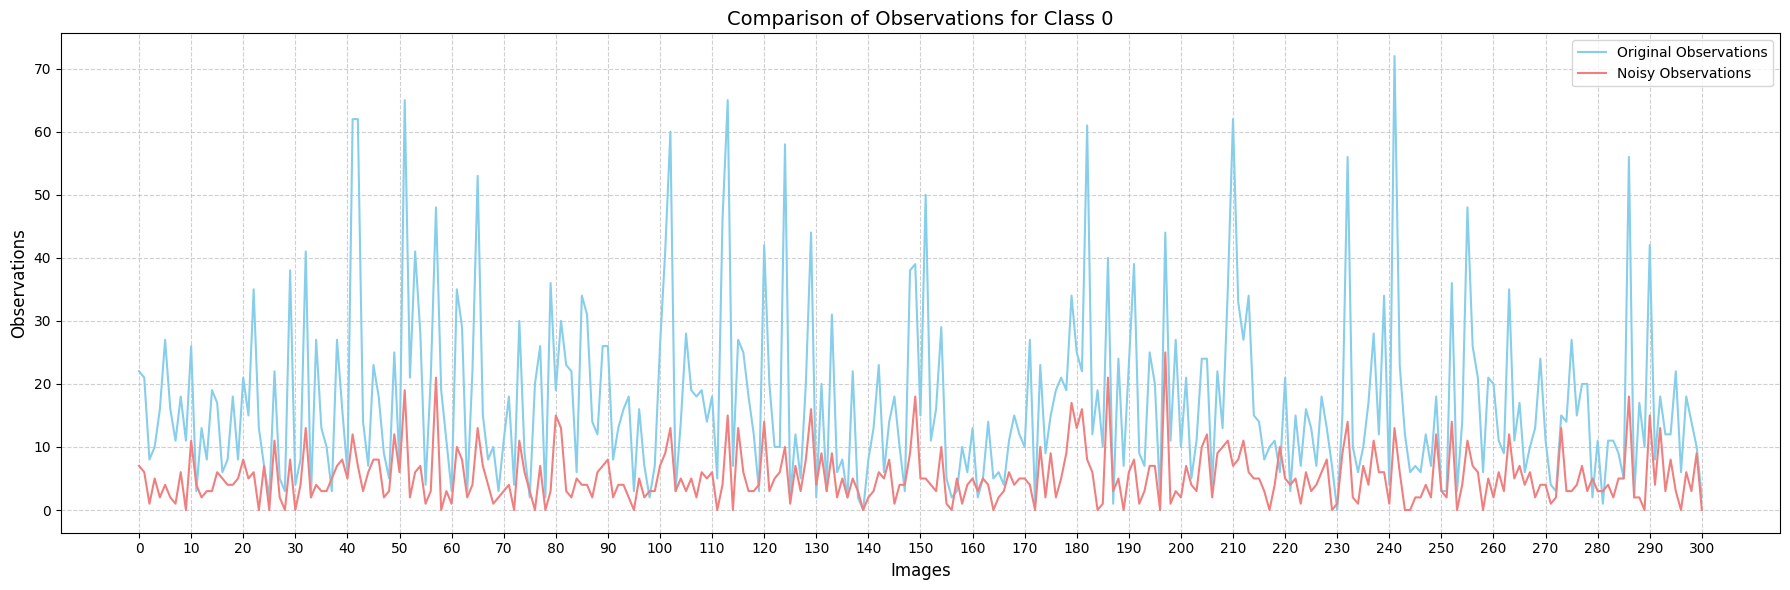

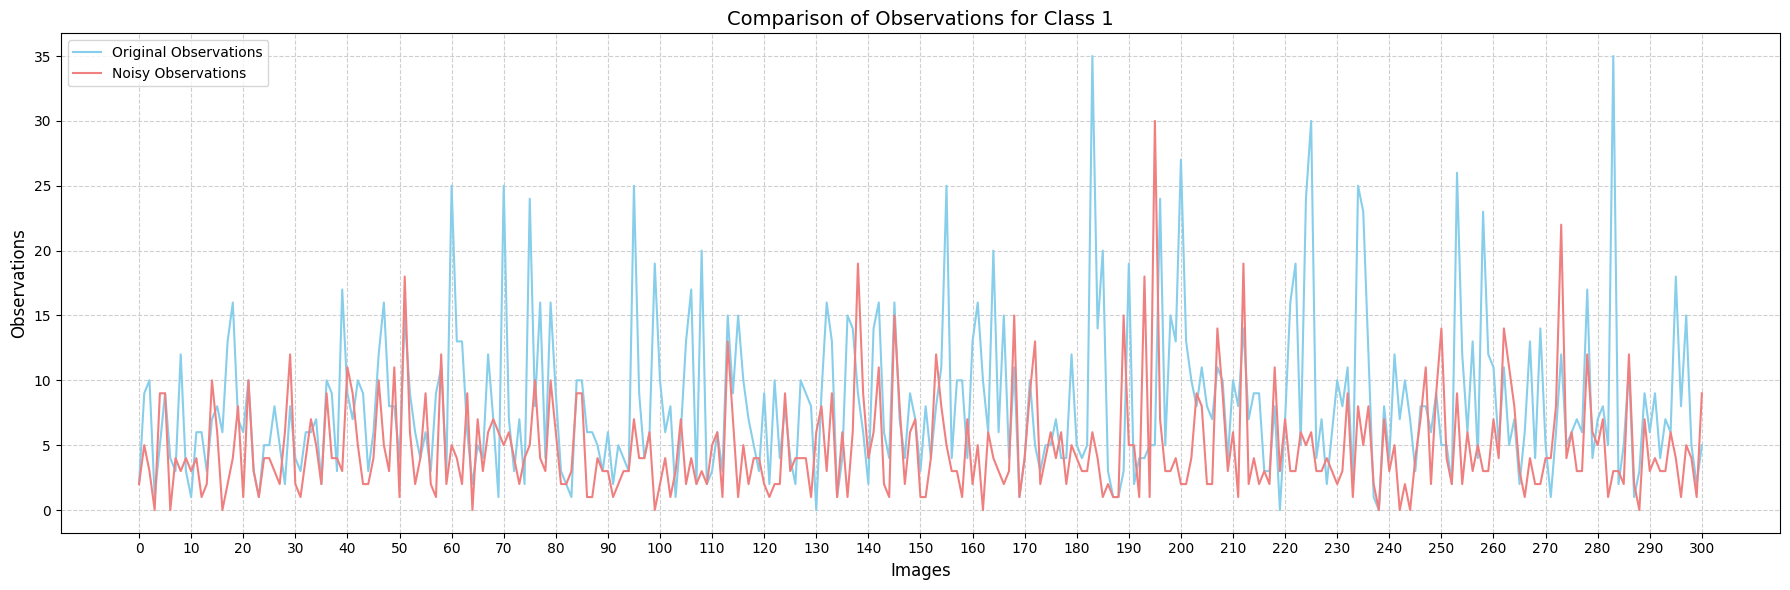

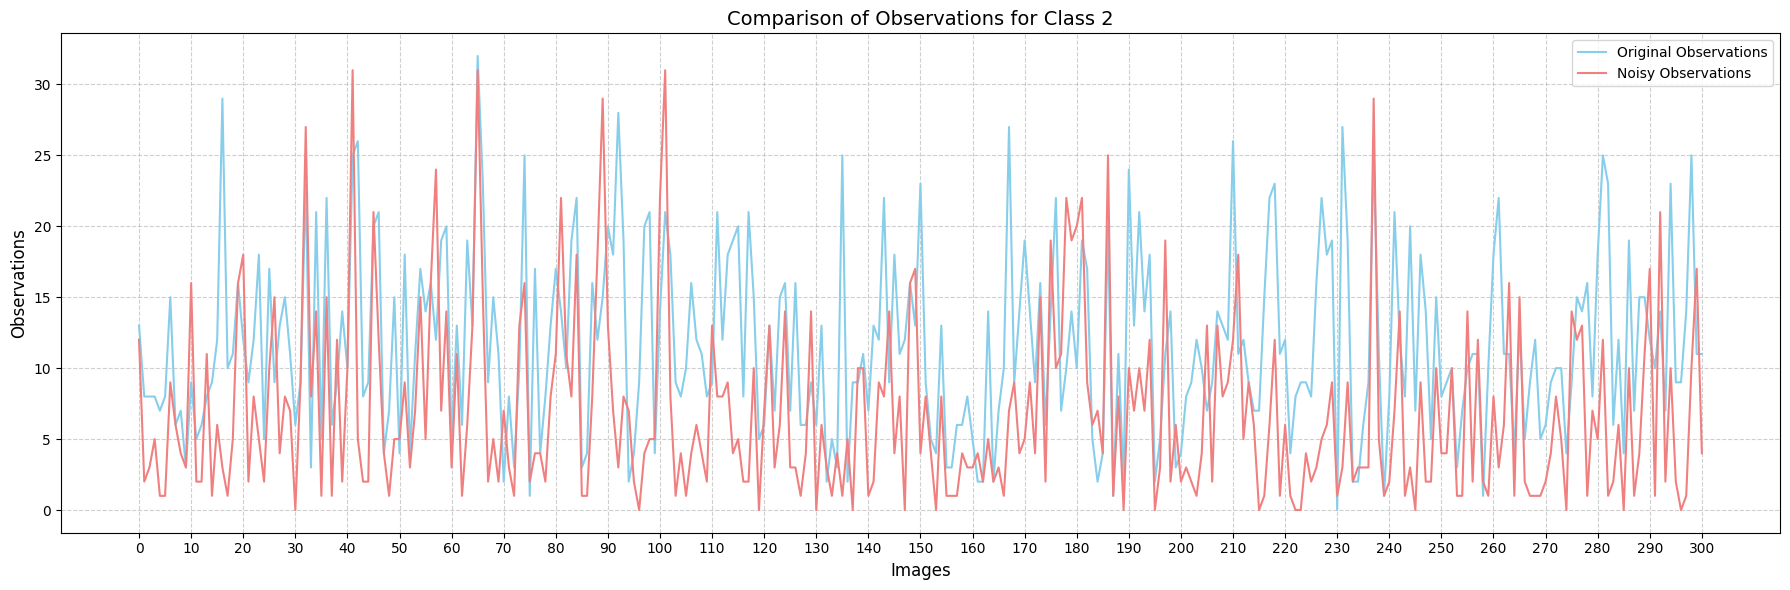

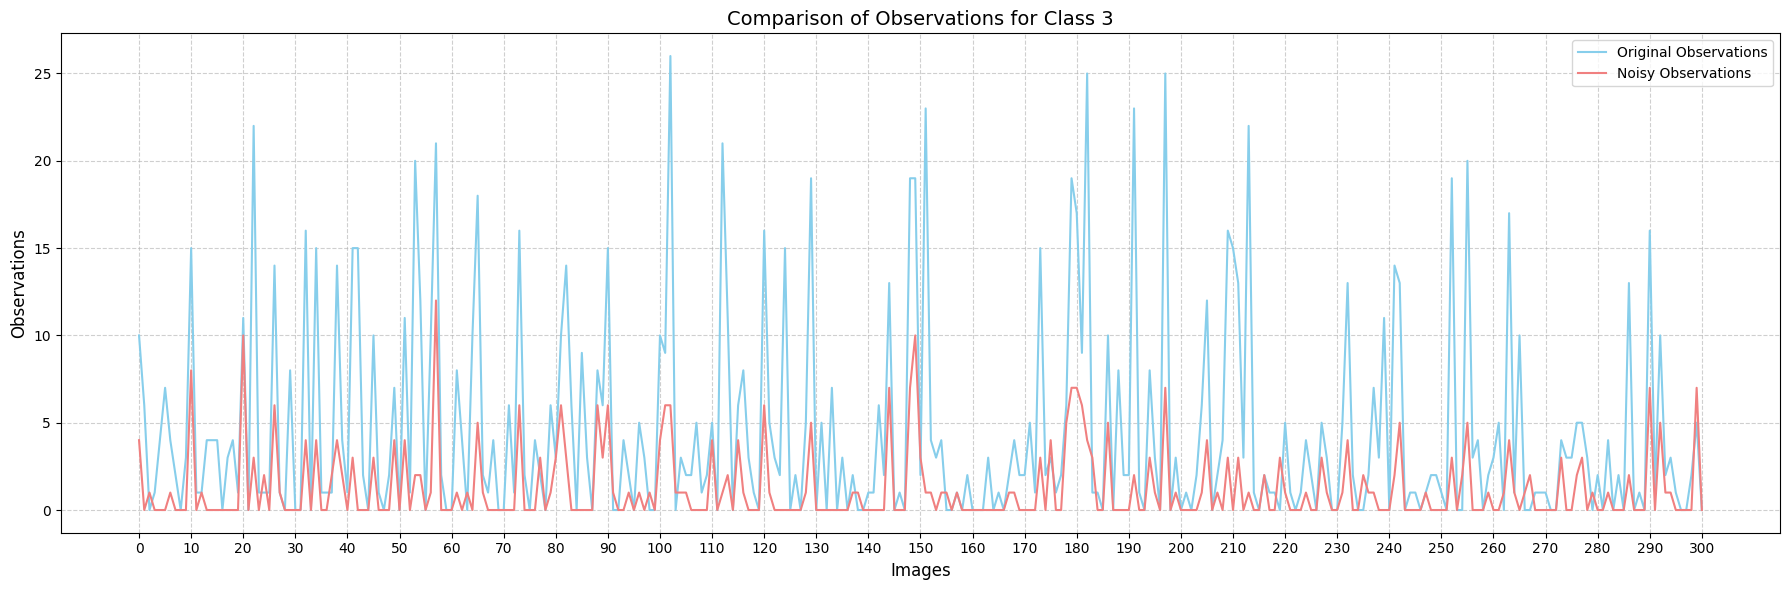

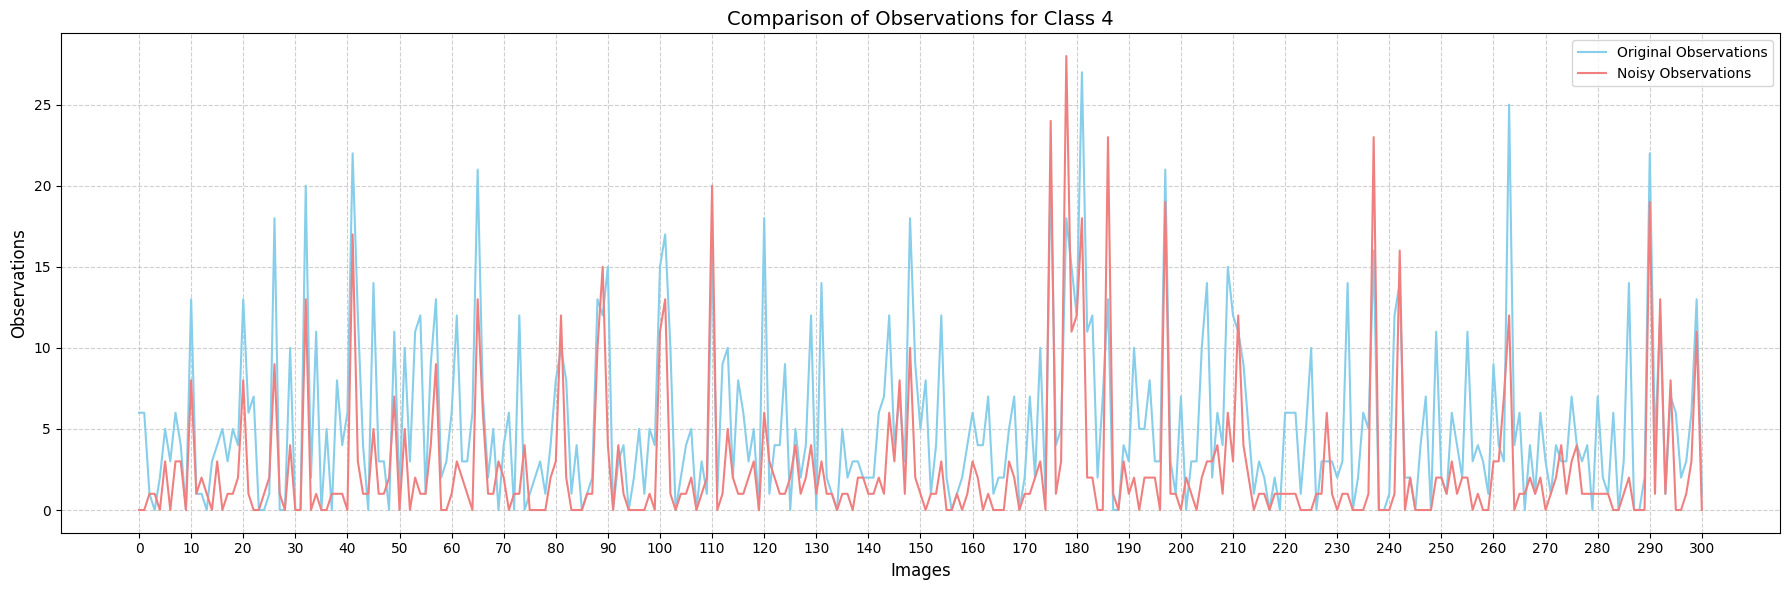

In [ ]:
def plot_class_observations(dataset, class_index, step=10):
    """
    Построение графика для наблюдений оригинальных и шумных данных для заданного класса.

    Параметры:
    - dataset: DataFrame с данными
    - class_index: индекс класса (например, 0, 1, 2 и т.д.)
    - step: шаг для меток оси X (по умолчанию 10)
    """
    x = np.arange(len(dataset))  # Позиции по оси X

    # Построение графика
    fig, ax = plt.subplots(figsize=(18, 3))

    # Построение линейного графика для оригинальных и шумных наблюдений
    ax.plot(x, dataset[f"original_{class_index}"], label="Original Observations", color="skyblue", linewidth=1.5)
    ax.plot(x, dataset[f"noisy_{class_index}"], label="Noisy Observations", color="lightcoral", linewidth=1.5)

    # Настройка осей и заголовка
    ax.set_xlabel("Images", fontsize=12)
    ax.set_ylabel("Observations", fontsize=12)
    ax.set_title(f"Comparison of Observations for Class {class_index}", fontsize=14)

    # Настройка меток оси X
    ax.set_xticks(range(0, len(dataset), step))
    ax.legend()

    # Сетка для улучшения читаемости
    ax.grid(True, linestyle='--', alpha=0.6)

    # Отображение графика
    plt.tight_layout()
    plt.show()

for i in range(0, 5):
  plot_class_observations(dataset, i, step=10)

# **2. Активации на оригинальных и зашумленных изображениях**


Для уточнения анализа, также были сняты статистики по средним и медианным значениям активации модели.




Text(0.5, 1.0, 'Absolute difference between model activations')

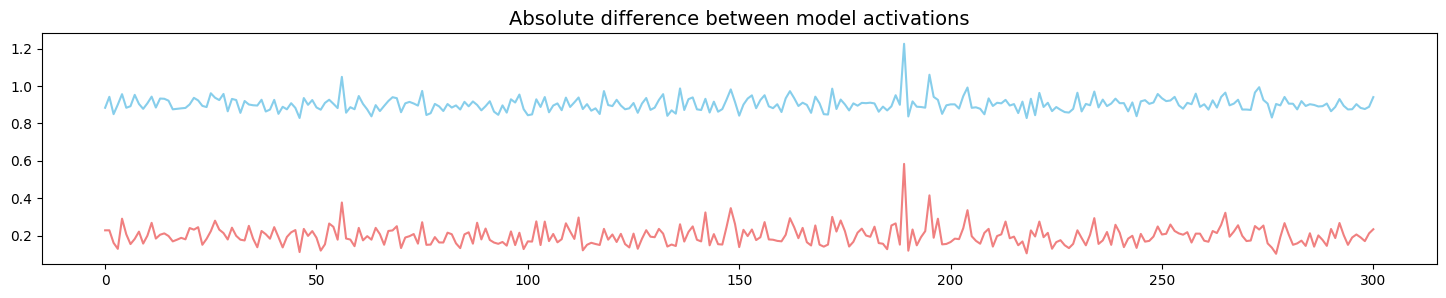

In [ ]:
fig, ax = plt.subplots(figsize=(18, 3))

x = range(0, len(dataset))

ax.plot(x, dataset['abs_diff_between_act_mean'], label="mean", color="skyblue", linewidth=1.5)
ax.plot(x, dataset['abs_diff_between_act_median'], label="median", color="lightcoral", linewidth=1.5)

ax.set_title(f"Absolute difference between model activations", fontsize=14)

In [ ]:
dataset['abs_diff_between_act_median'].min(), dataset['abs_diff_between_act_median'].max()

(0.1027396321296691, 0.5833998918533325)


**Выводы:**

Отрезки для средних и медианные значения активаций модели:

*  Средние значения: `[0.82,1.3][0.82,1.3]`
*  Медианные значения: `[0.1,0.6][0.1,0.6]`

— Медианные значения стабильно меньше средних, что свидетельствует о наличии зон на изображении, где активации меняются значительно сильнее или слабее, чем в среднем. \
— Изменения связаны с локальными особенностями изображения, на которые шум влияет сильнее, что видно на результатах карт активаций. \
— Внесение шума сбивает область, на которую модель обращает внимание в случайном порядке. \


# **3. Общий итог проекта**

**Практическое использование:**
Класс 3 демонстрирует высокую устойчивость к шуму, что делает его наиболее надежным с точки зрения прогнозирования в условиях помех. Для других классов может потребоваться дополнительная настройка модели.


**Использование CAM:**
Карты активации (CAM) могут быть использованы для дальнешего анализа областей, подверженных влиянию шума. Рассмотрение карт может помочь выработать гипотезы о локальном улучшении набора данных.


**Возможные стратегии улучшения модели:**
— Использование данных c аугментацией для увеличения устойчивости модели к шуму.


Проведенный анализ показал, что добавление шума приводит к заметным изменениям в прогнозах модели. Уровень устойчивости к шуму варьируется в зависимости от класса (от 3 до 25%).  Карты активации позволяют понять изменения в процессе детекции и могут быть использованы для дальнейшего улучшения модели.